In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv("../data/PJME_hourly.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [6]:
df.shape

(145366, 2)

In [7]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [8]:

print("Start date:", df['Datetime'].min())
print("End date:", df['Datetime'].max())

Start date: 2002-01-01 01:00:00
End date: 2018-08-03 00:00:00


In [9]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

In [10]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [11]:
# check if data is hourly
df.index.inferred_freq


In [12]:
df.isna().sum()


PJME_MW    0
dtype: int64

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


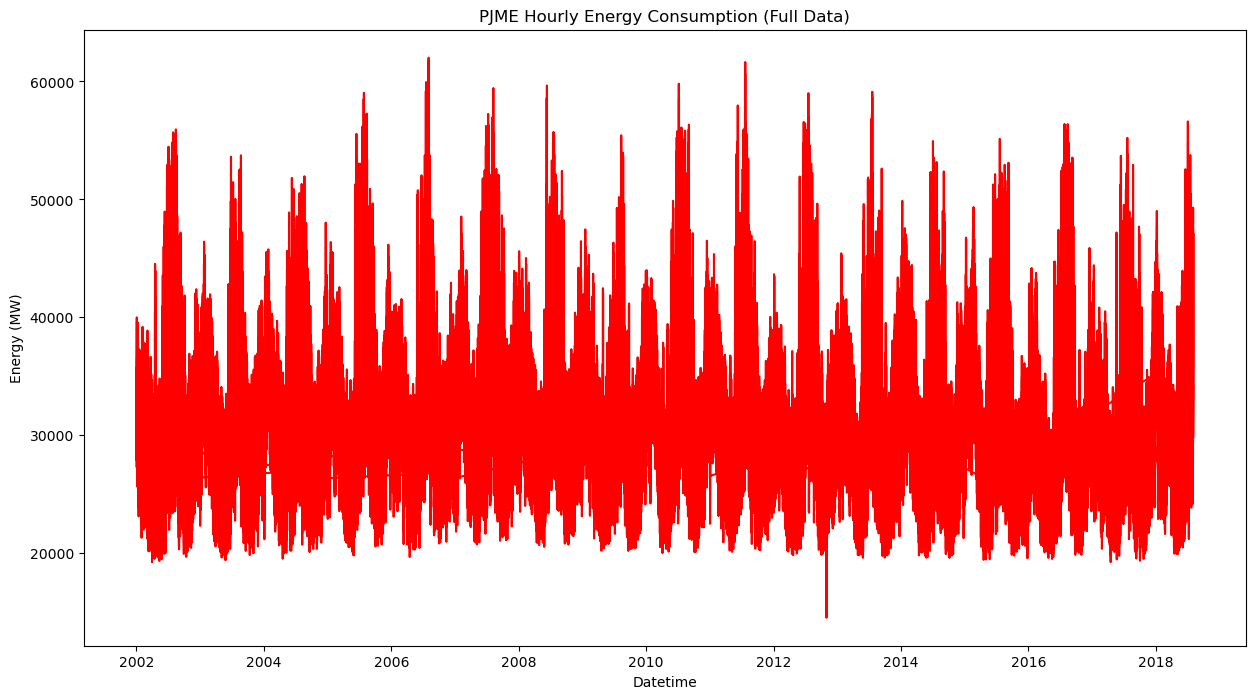

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(df['PJME_MW'], color='red')
plt.title('PJME Hourly Energy Consumption (Full Data)')
plt.xlabel('Datetime')
plt.ylabel('Energy (MW)')
plt.show()


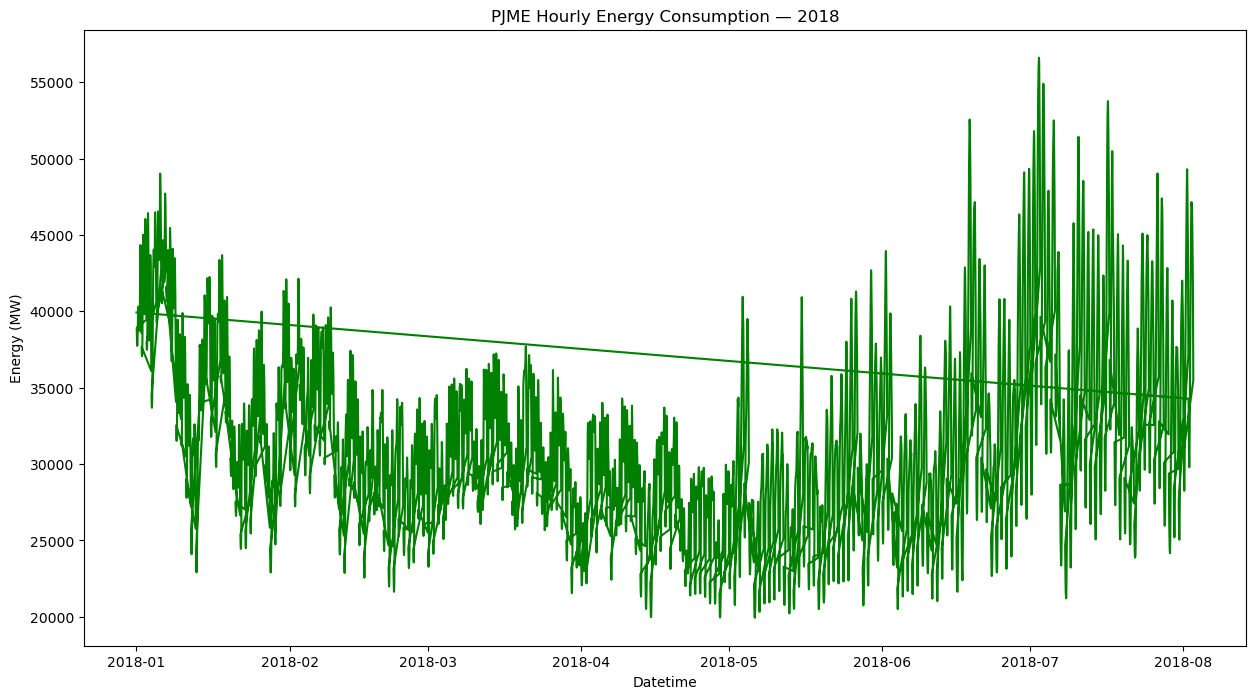

In [15]:
df_2018 = df.loc['2018']
plt.figure(figsize=(15,8))
plt.plot(df_2018['PJME_MW'], color='green')
plt.title('PJME Hourly Energy Consumption — 2018')
plt.xlabel('Datetime')
plt.ylabel('Energy (MW)')
plt.show()


Year 2018 (Overall View)

    Energy consumption is high at the beginning of the year (~45,000 MW in January).

    Demand declines steadily and reaches a local minimum around May.

    From June onward, consumption shows a strong upward trend.

    July is the peak month, with values reaching ~55,000 MW, the highest in 2018.

    August shows a slight decline compared to July.

Key insight:

    High demand in winter (Jan) → heating

    Lower demand in spring (Apr–May) → mild weather

    Peak in summer (Jul) → air conditioning

    Slight drop after peak summer


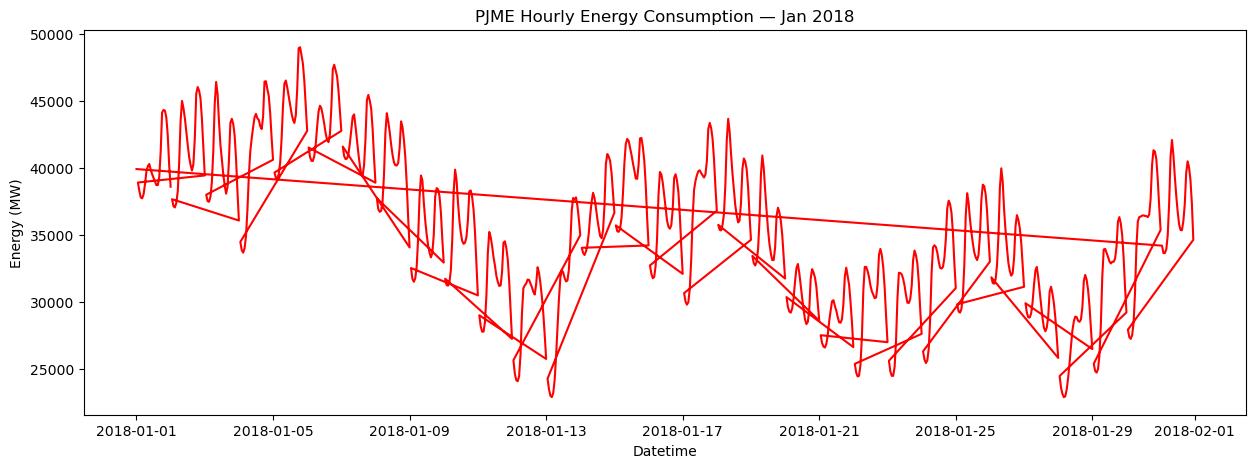

In [16]:
df_jan2018 = df.loc['2018-01']
plt.figure(figsize=(15,5))
plt.plot(df_jan2018['PJME_MW'], color='red')
plt.title('PJME Hourly Energy Consumption — Jan 2018')
plt.xlabel('Datetime')
plt.ylabel('Energy (MW)')
plt.show()


January 2018 (Monthly View)

    From Jan 1–5, there is a clear upward trend, peaking near 50,000 MW on Jan 5.

    From Jan 5–13, consumption shows a strong downward trend, reaching a low of ~25,000 MW.

    Jan 13–17 shows a recovery (upward trend).

    Jan 17–21 shows another decline, comparable to the previous dip.

    From Jan 21–25, demand rises again.

    After Jan 25, consumption declines toward month-end.

Key insight:

    The month shows repeating cycles, not a smooth trend.

    This strongly suggests weekly seasonality (weekdays vs weekends).

In [22]:
df_week = df.loc['2018-01-01':'2018-01-07']
plt.figure(figsize=(15,3))
plt.plot(df_week['PJME_MW'], color='orange')
plt.title('Jan 1-7, 2018')
plt.show()


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

First Week of January 2018 (Weekly View)

    First 3 days show high volatility, fluctuating between 38,000–46,000 MW.

    On Jan 4, there is a sharp drop to ~34,000 MW.

    From Jan 5–7, consumption rises again with strong upward fluctuations.

    The peak occurs around Jan 7, exceeding 48,000 MW.   

Important intuition:

    Clear daily seasonality (hourly peaks & troughs)

    Possible weekday vs weekend effect

    Sudden drops may be:

        Weekends

        Holidays

        Weather events

In [18]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [23]:
time_diffs = df.index.to_series().diff().value_counts().head(10)
time_diffs


Datetime
0 days 01:00:00      139275
-2 days +01:00:00      6040
0 days 02:00:00          29
729 days 01:00:00         8
728 days 01:00:00         7
0 days 00:00:00           4
-2 days +02:00:00         1
577 days 01:00:00         1
Name: count, dtype: int64

In [26]:
df.index.duplicated().sum()


4

In [27]:
df = df.groupby(df.index).mean()


In [28]:
df.index.is_unique


True

In [29]:
df_hourly = df.asfreq('H')
df_hourly.index.inferred_freq



C:\Users\POWER\AppData\Local\Temp\ipykernel_14992\2292973008.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.asfreq('H')


'h'

In [30]:
df_hourly.isna().sum()


PJME_MW    30
dtype: int64

In [31]:
missing_hours = df_hourly['PJME_MW'].isna().sum()
missing_hours

30

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decomp = df_hourly.dropna()


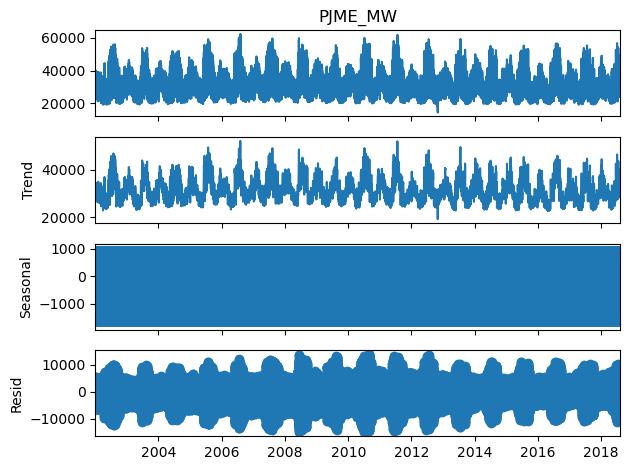

In [33]:
decomp_daily = seasonal_decompose(
    df_decomp['PJME_MW'],
    model='additive',
    period=24
)

decomp_daily.plot()
plt.show()


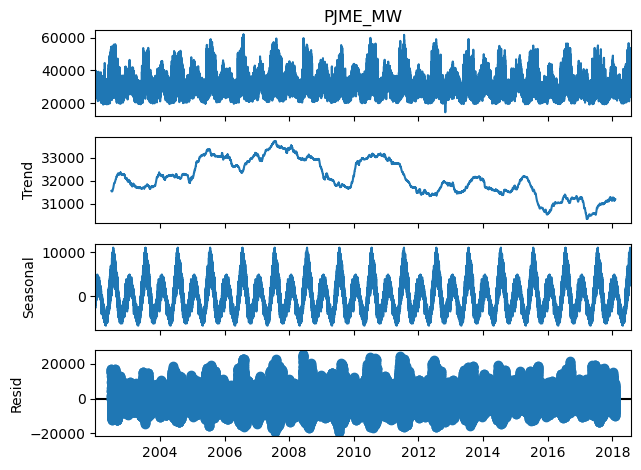

In [34]:
decomp_yearly = seasonal_decompose(
    df_decomp['PJME_MW'],
    model='additive',
    period=24*365
)

decomp_yearly.plot()
plt.show()
